In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
import seaborn as sns

Для начала выведем общую информацию о нашем датасете, дабы увидеть число пропусков, а также распределение таргета(Riskscore), чтобы проверить его на наличие значений, выходящих из интеравала от 1 до 100, в котором и должна находиться вероятность выдачи займа.

In [ ]:
df = pd.read_csv("train.csv")#у меня сломался кагл, так что пути изменены.

df.info()
df




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,2010-07-10,57.0,300000.0,850.0,14756.0,48.0,Married,2.0,Own,620.0,...,Employed,Associate,38.0,167544.0,0.094756,0.106387,378.792448,0.039952,1.0,32.440586
11013,2003-10-22,28.0,15000.0,300.0,51361.0,96.0,Single,1.0,Own,696.0,...,Employed,Bachelor,5.0,116879.0,0.446361,0.401087,1793.042130,1.991234,0.0,67.673170
11014,1983-05-12,23.0,15000.0,302.0,30724.0,72.0,Married,3.0,Rent,413.0,...,Self-Employed,Associate,0.0,250778.0,0.404724,0.360670,1047.672294,1.168538,0.0,75.292707
11015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


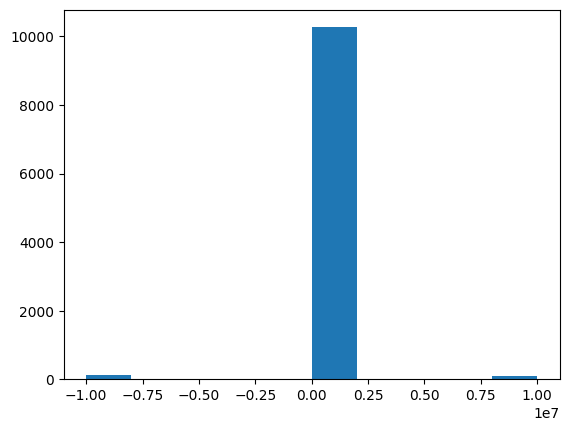

In [ ]:
plt.hist(df["RiskScore"])  # смотрим на зависимость

plt.show()

Как мы можем увидеть, несмотря на то, что уверенность в размере 10000 % переодчиски проскакивает в разговорной речи, все ж, применимо к статистике, данная велична все же не должна превышать 100. Скорее всего, такие выбросы в таргете вызваны по большей части наличем полностью строк, заполненными np.Nan. Давайте избавимся от них при помощи маски, примененной к нашей таблице.

In [ ]:
df = df[(df["RiskScore"] <= 100) & (df["RiskScore"] > 0)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10272 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10272 non-null  object 
 1   Age                         10272 non-null  float64
 2   AnnualIncome                10272 non-null  float64
 3   CreditScore                 9787 non-null   float64
 4   LoanAmount                  9787 non-null   float64
 5   LoanDuration                10272 non-null  float64
 6   MaritalStatus               10272 non-null  object 
 7   NumberOfDependents          10272 non-null  float64
 8   HomeOwnershipStatus         10272 non-null  object 
 9   MonthlyDebtPayments         9787 non-null   float64
 10  CreditCardUtilizationRate   10272 non-null  float64
 11  NumberOfOpenCreditLines     10272 non-null  float64
 12  NumberOfCreditInquiries     10272 non-null  float64
 13  DebtToIncomeRatio           10272 no

Как мы видим, исчезло порядком 800 записей, что не повлияет на целостность данных для обучения, так что удаление выбросов было довольно оправданным. Давайтем посмотрим таблицу на пропуски, и если их окажется довольно мало, то избавимся от них. Вначале "удалим" все полностью пустые строки, дабы убедиться, что они исчезли еще при очистке выбросов из таргета, а после удалим оставшиеся(400+) строк с отсттствующими значениями(такая потеря также слабо повлят на целостность данных в нашей модели)
P.S.(я пытался заполнять медианой, средним  и с использованием knn-соседей, у меня mse увеличивался, так что я в итоге, останавливался на удалении).

In [ ]:
print(df.isnull().sum()) # смотрим на пропуски
misses = (df.isnull().sum()[df.isnull().sum()>0]).index # вытащим список siries с пропусками
df[df[misses].isnull().all(axis=1)] # отсутствующие и есть все 471 - по ним нет данных с их зарплат - удалим
print('------------------------------------------------------')
print(df.isnull().sum()) # смотрим на пропуски
df = df.dropna()



ApplicationDate                 0
Age                             0
AnnualIncome                    0
CreditScore                   485
LoanAmount                    485
LoanDuration                    0
MaritalStatus                   0
NumberOfDependents              0
HomeOwnershipStatus             0
MonthlyDebtPayments           485
CreditCardUtilizationRate       0
NumberOfOpenCreditLines         0
NumberOfCreditInquiries         0
DebtToIncomeRatio               0
BankruptcyHistory             485
LoanPurpose                   485
PreviousLoanDefaults            0
PaymentHistory                  0
LengthOfCreditHistory           0
SavingsAccountBalance           0
CheckingAccountBalance        485
TotalAssets                   485
TotalLiabilities                0
MonthlyIncome                   0
UtilityBillsPaymentHistory      0
JobTenure                       0
EmploymentStatus                0
EducationLevel                  0
Experience                      0
NetWorth      

Как же хорошо, что теперь в датасете отстуствуют  Nan, но мы все еще забываем об одной проблеме, что также может быть обнаружена в наших данных - дубликаты записей. Используя функцию pandas - duplicated найдем все дубликаты в нашей таблице, и если их число не равно 0 - удалим, применив маску.

In [ ]:
print(df.duplicated().sum())
df = df[df.duplicated() == False]

455


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9332 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             9332 non-null   object 
 1   Age                         9332 non-null   float64
 2   AnnualIncome                9332 non-null   float64
 3   CreditScore                 9332 non-null   float64
 4   LoanAmount                  9332 non-null   float64
 5   LoanDuration                9332 non-null   float64
 6   MaritalStatus               9332 non-null   object 
 7   NumberOfDependents          9332 non-null   float64
 8   HomeOwnershipStatus         9332 non-null   object 
 9   MonthlyDebtPayments         9332 non-null   float64
 10  CreditCardUtilizationRate   9332 non-null   float64
 11  NumberOfOpenCreditLines     9332 non-null   float64
 12  NumberOfCreditInquiries     9332 non-null   float64
 13  DebtToIncomeRatio           9332 non-n

In [ ]:
print(df.isnull().sum())  # смотрим на пропуски

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
EmploymentStatus              0
EducationLevel                0
Experience                    0
NetWorth                      0
BaseInterestRate              0
Interest

Давайте посмотрим на всякую non-object feature  с использованием boxplota - дабы определить распределение признаков, наличие там выбросов и являются ли они ярко выраженными выбросами.

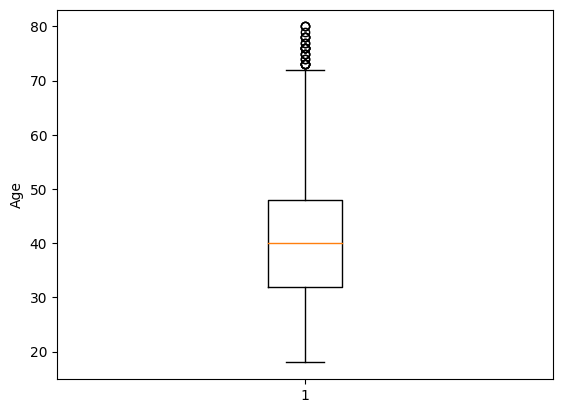

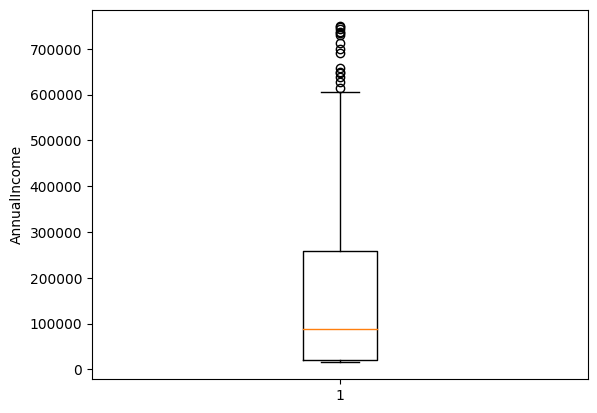

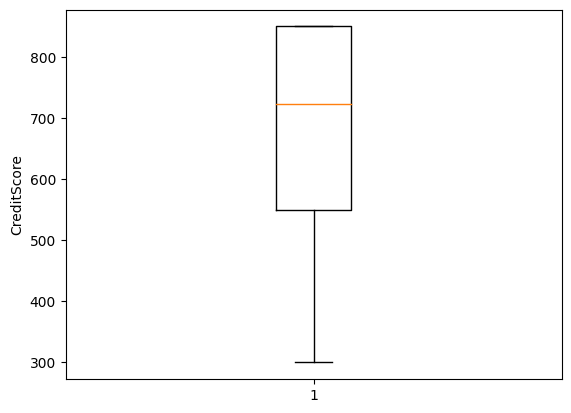

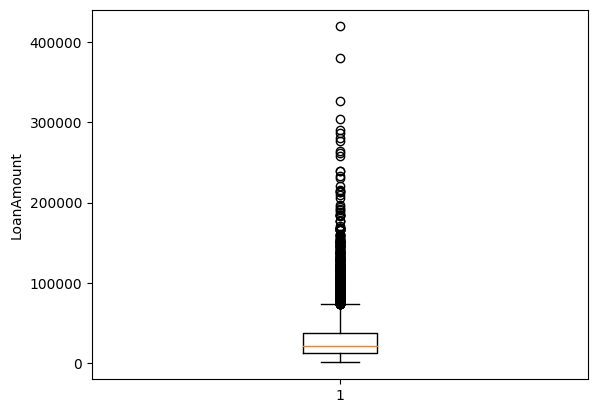

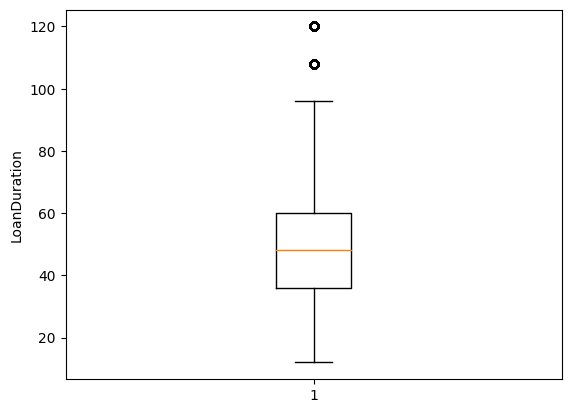

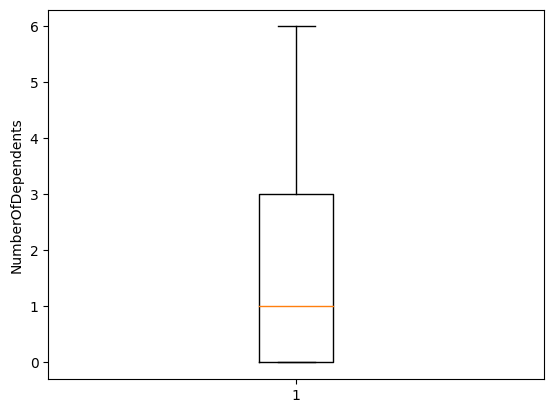

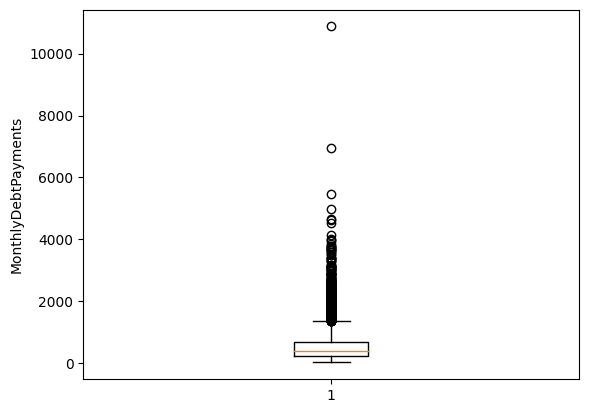

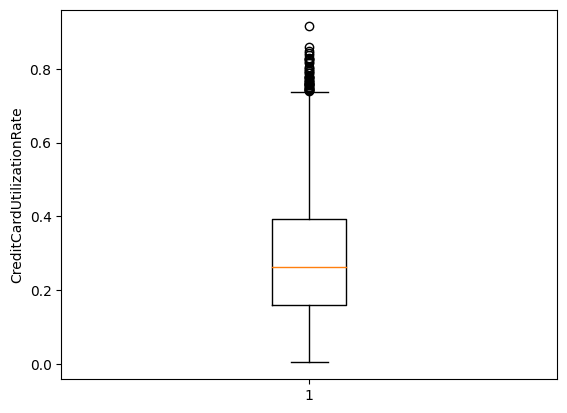

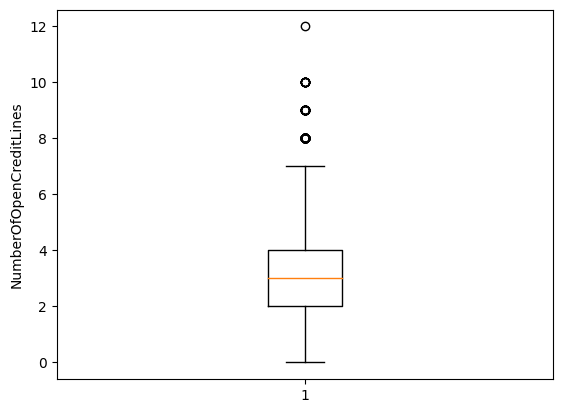

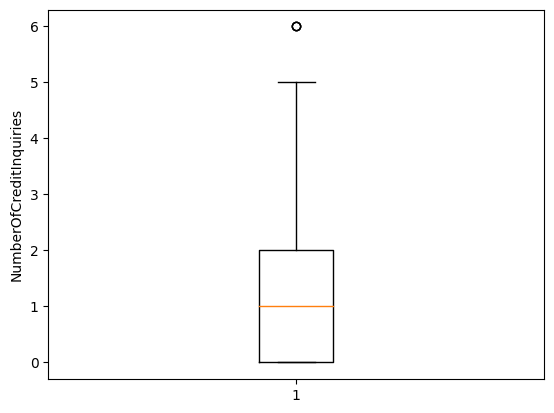

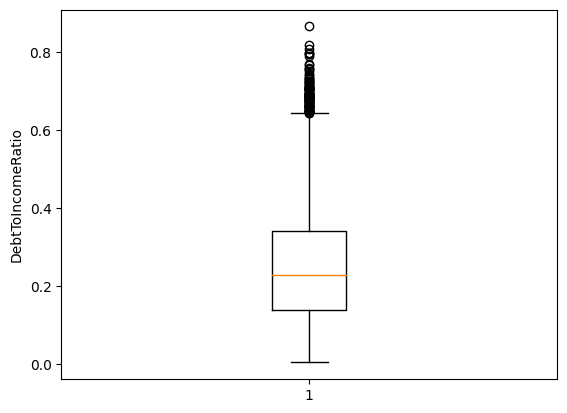

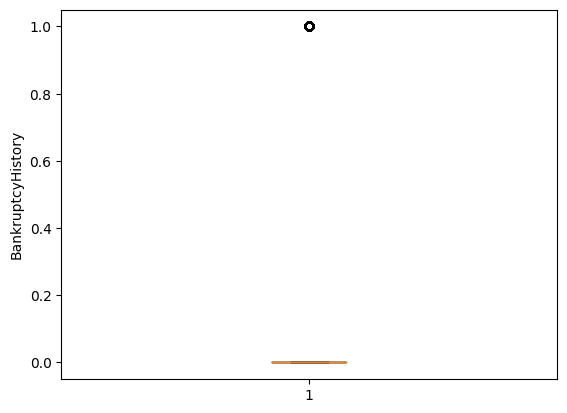

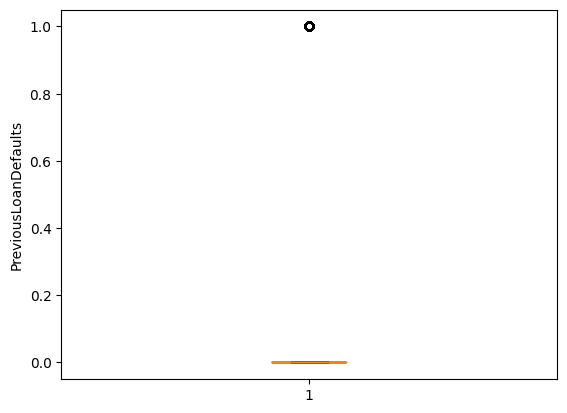

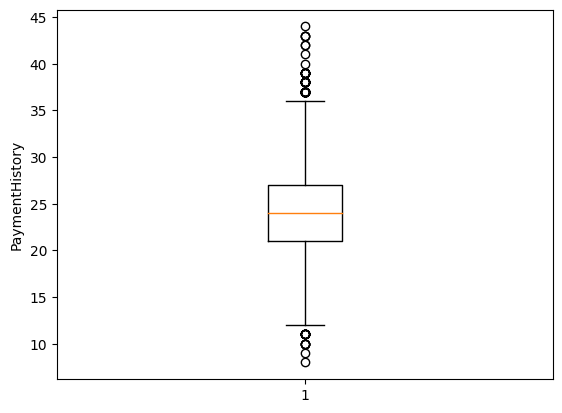

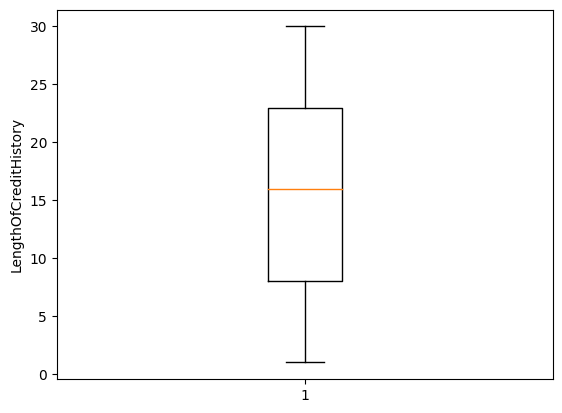

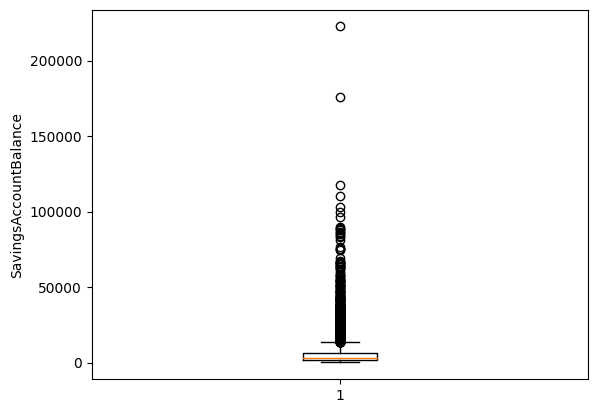

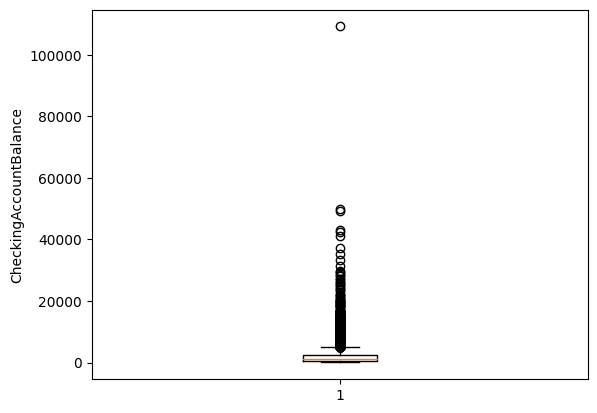

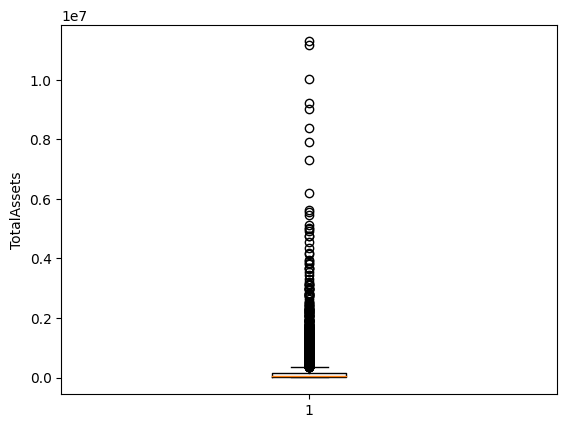

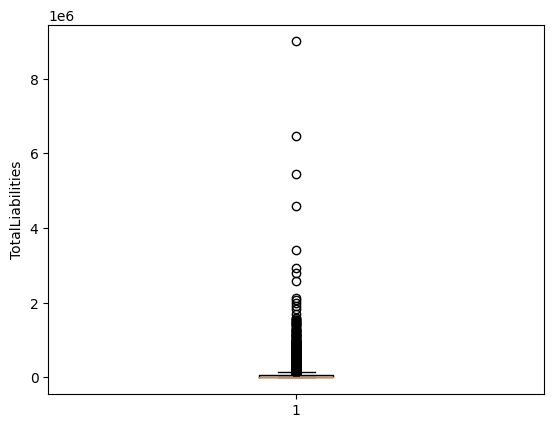

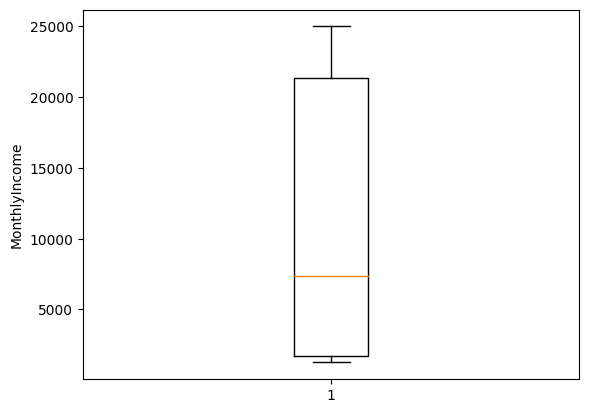

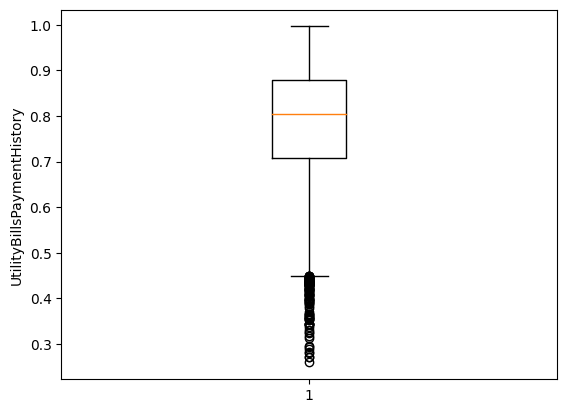

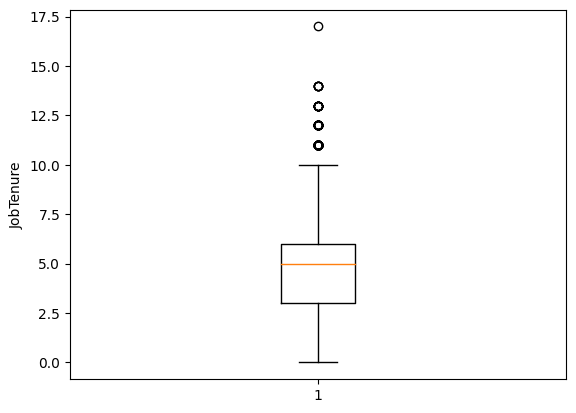

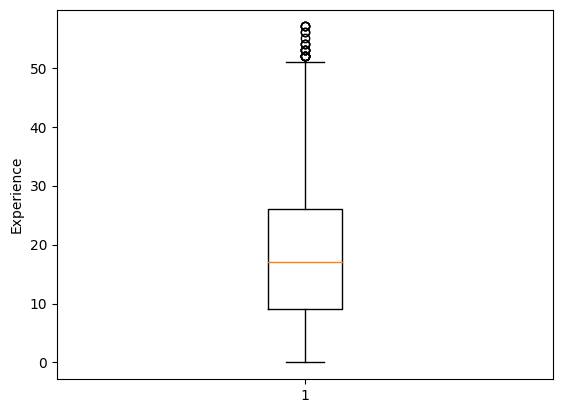

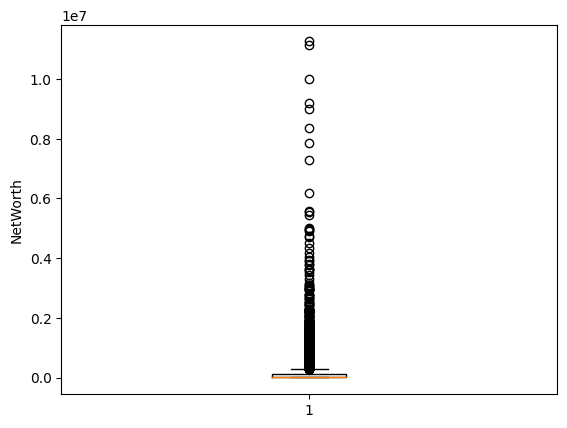

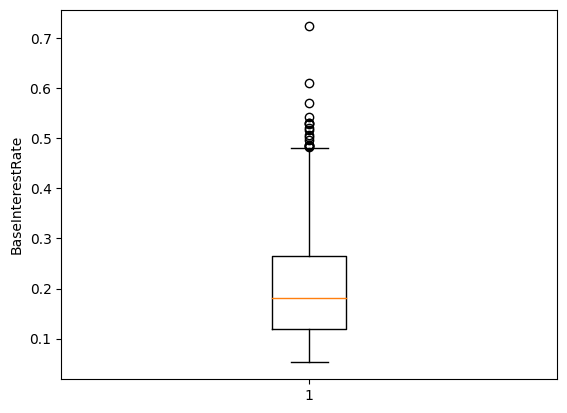

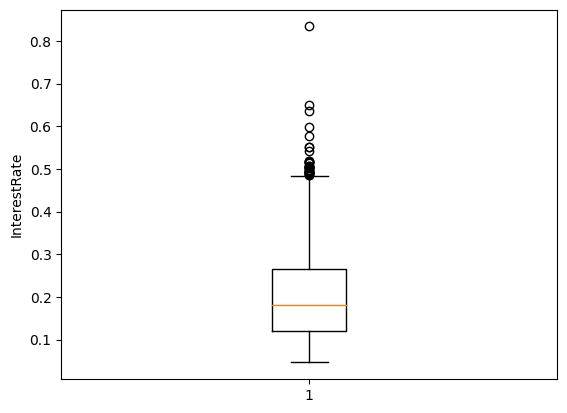

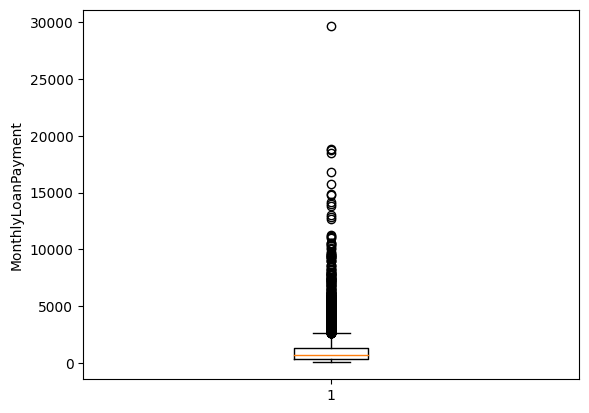

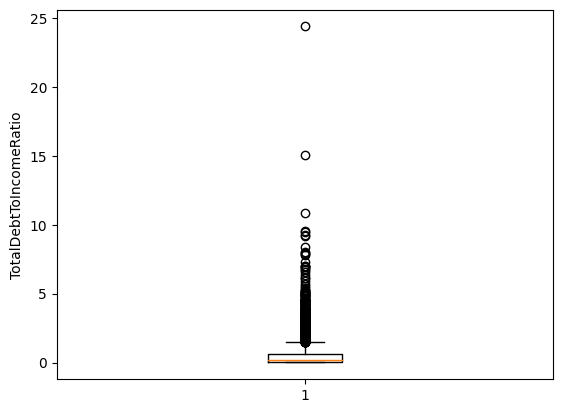

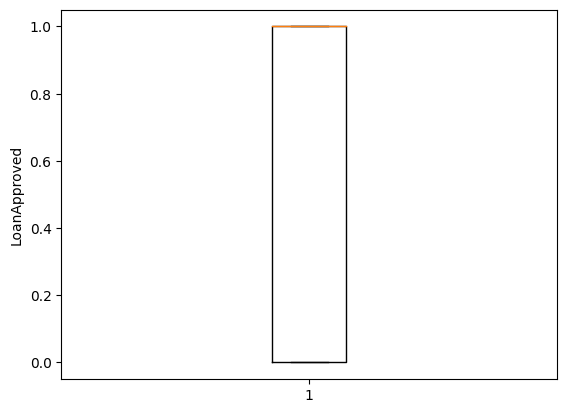

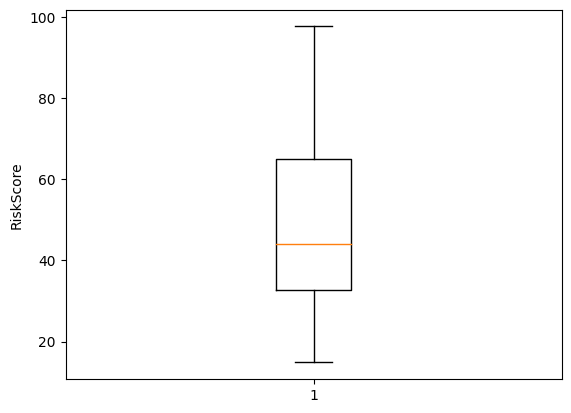

In [ ]:
for collumn in df.columns.tolist():
  if pd.api.types.is_numeric_dtype(df[collumn]):
    plt.boxplot(df[collumn])
    plt.ylabel(collumn)
    plt.show()


Также посмотрим на зависимость меж таргетом и каждым из числовых признаков

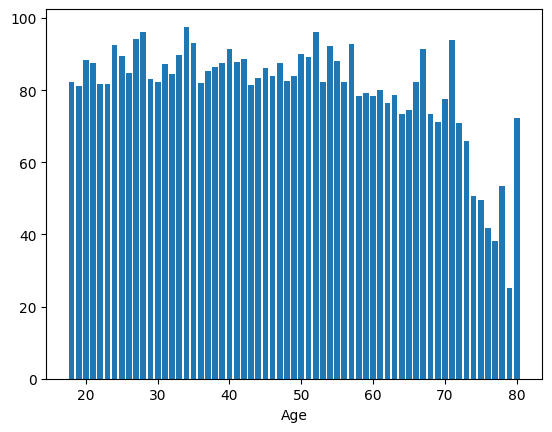

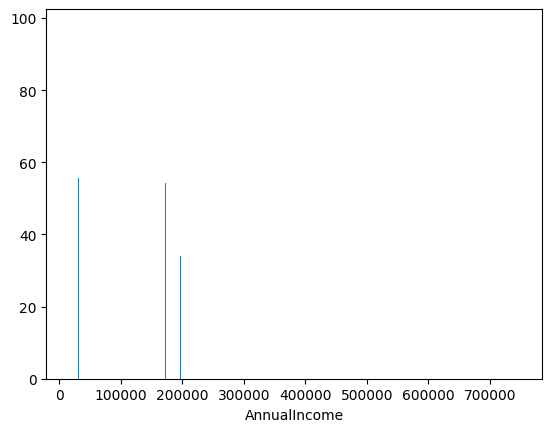

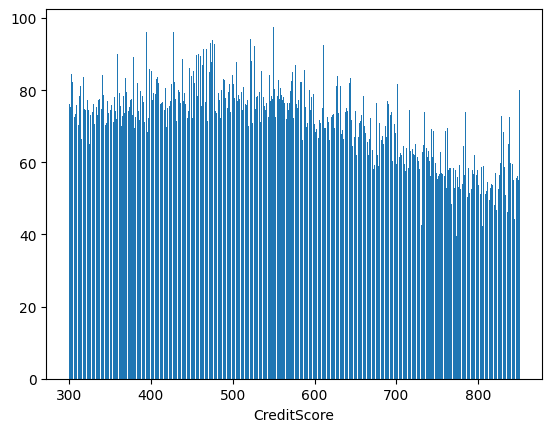

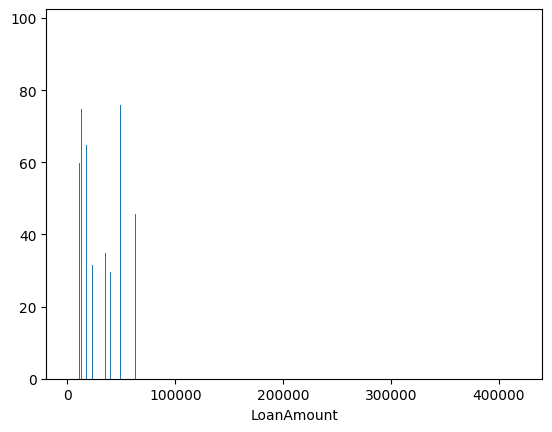

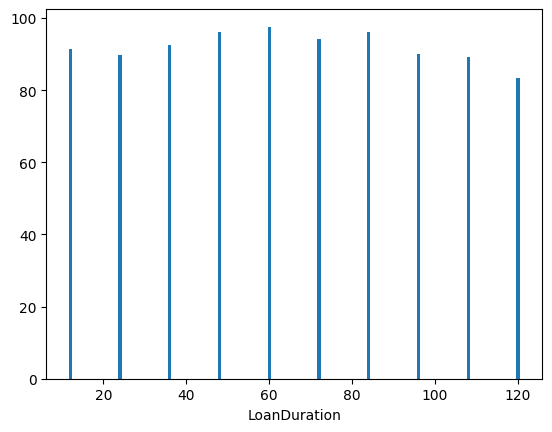

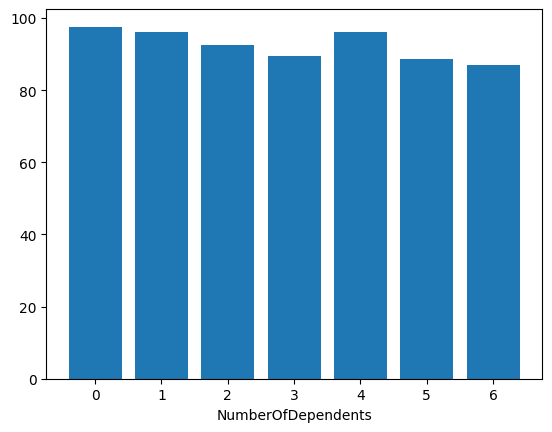

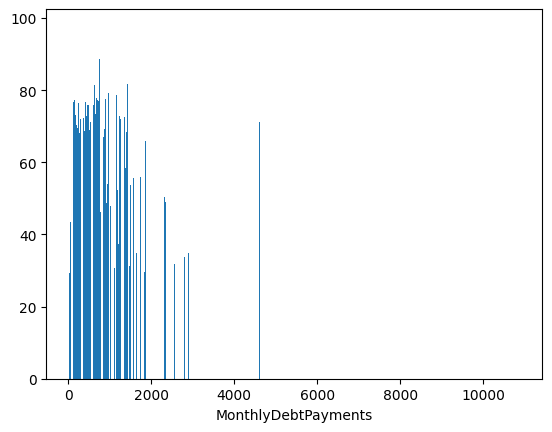

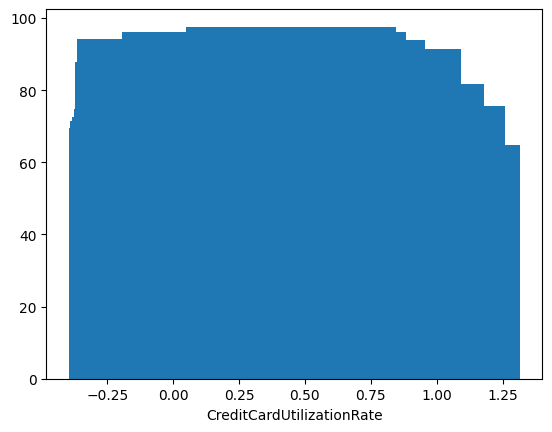

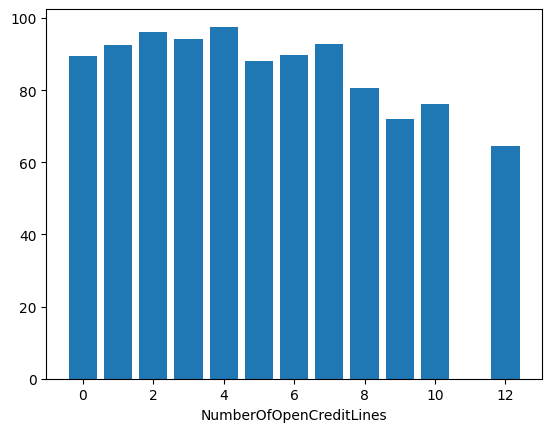

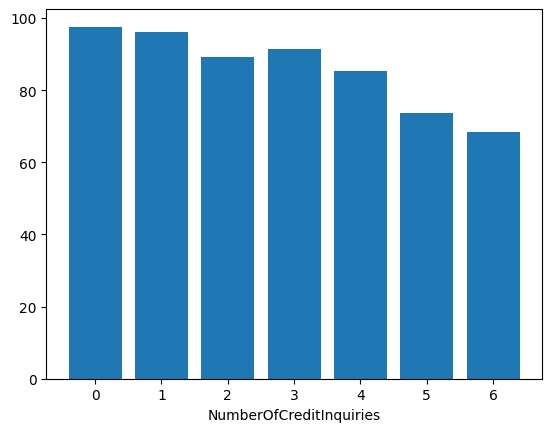

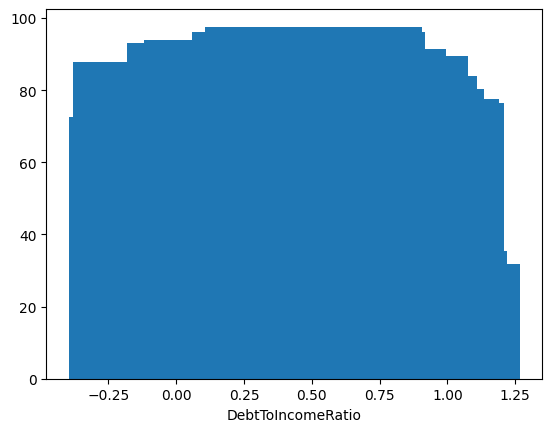

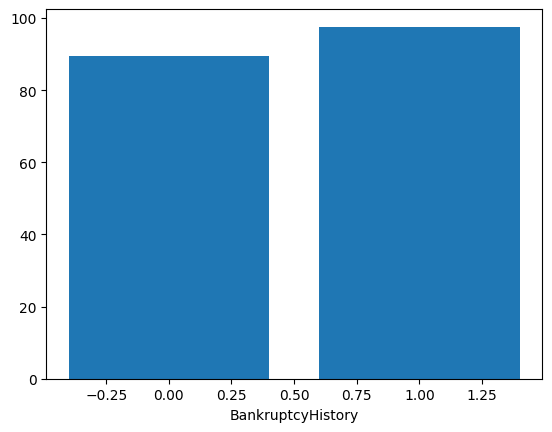

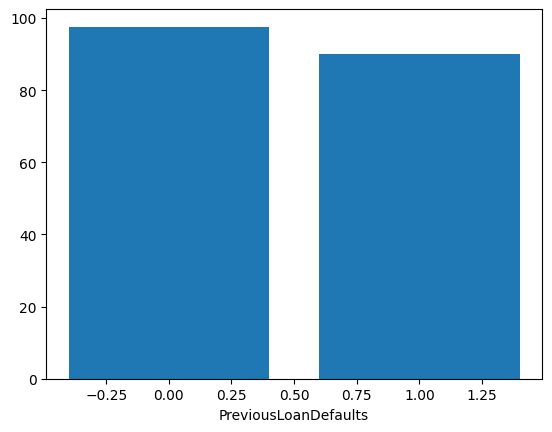

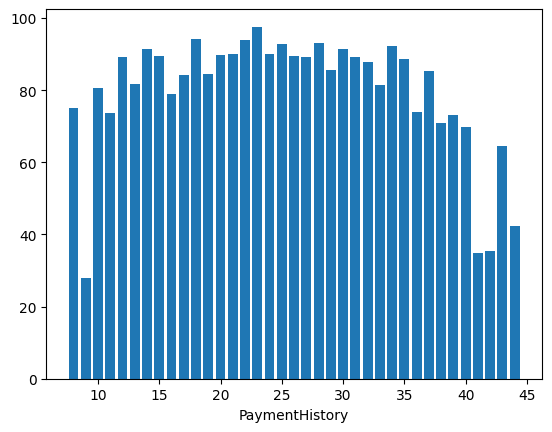

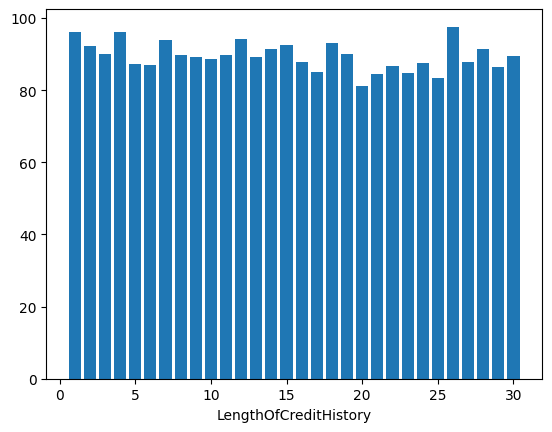

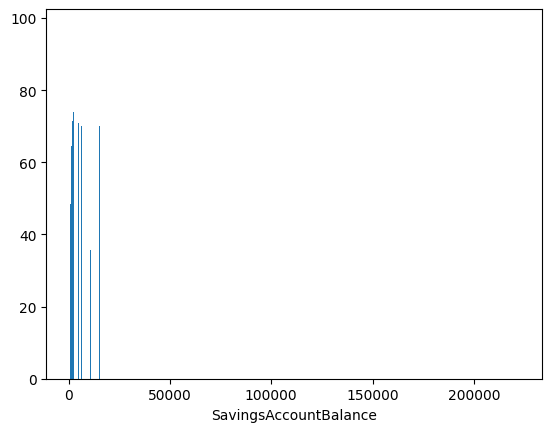

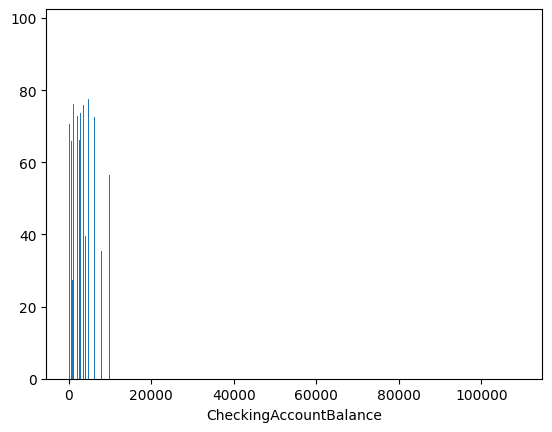

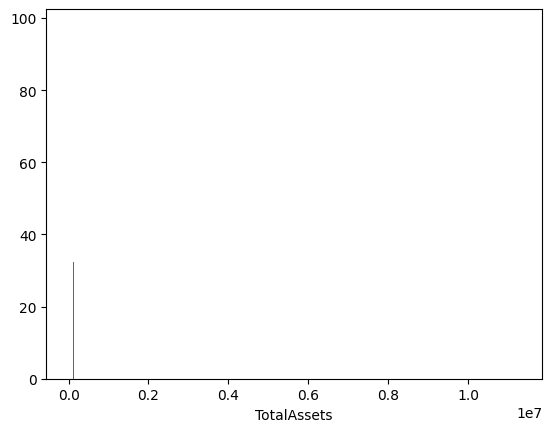

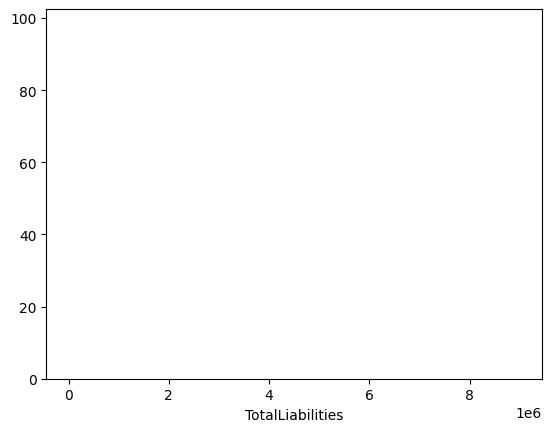

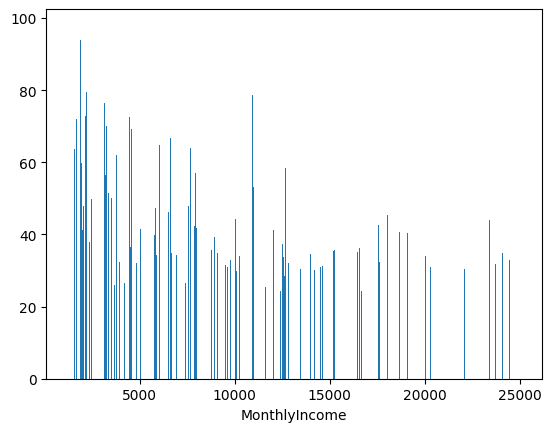

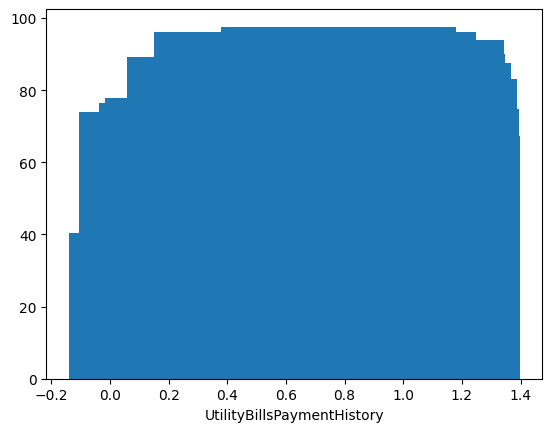

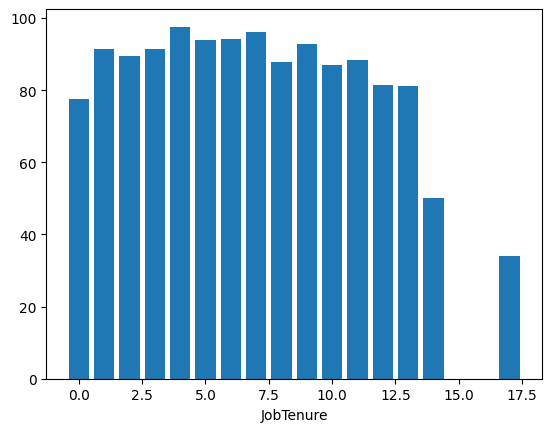

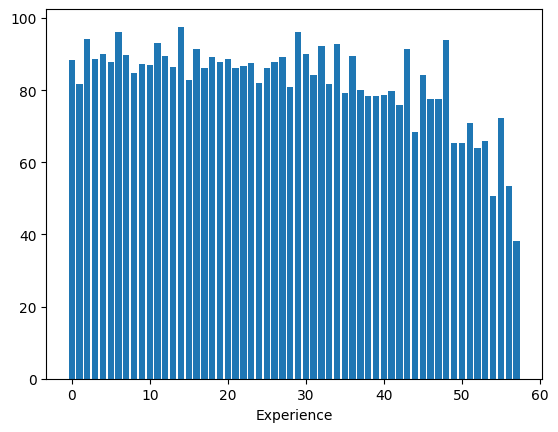

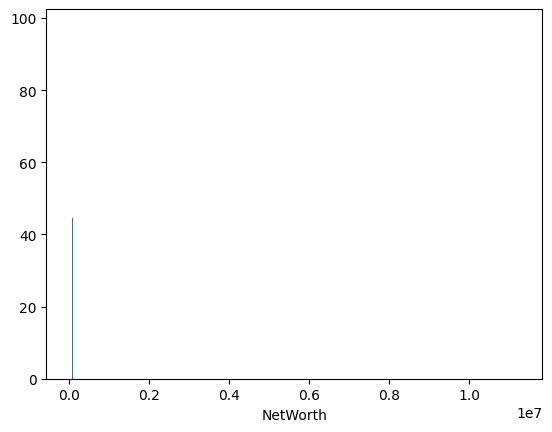

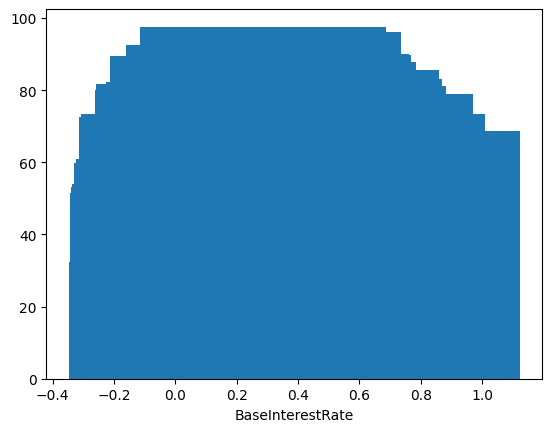

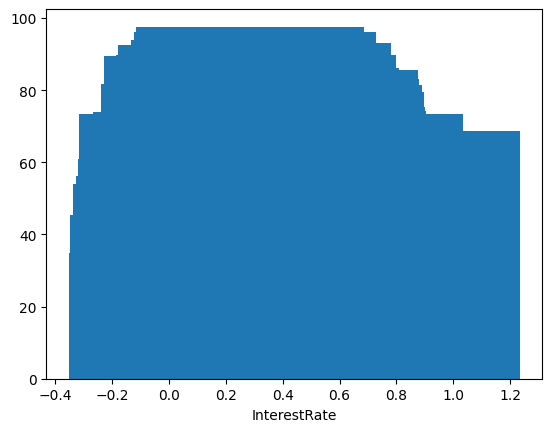

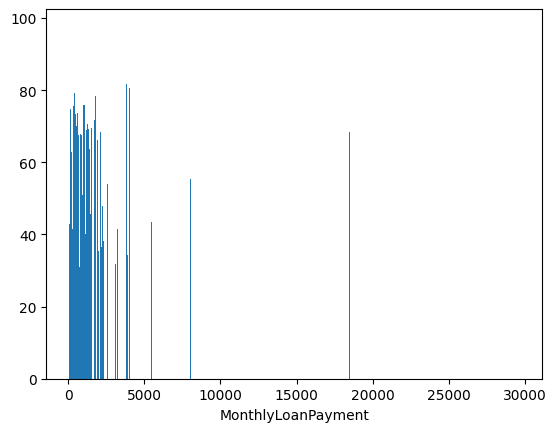

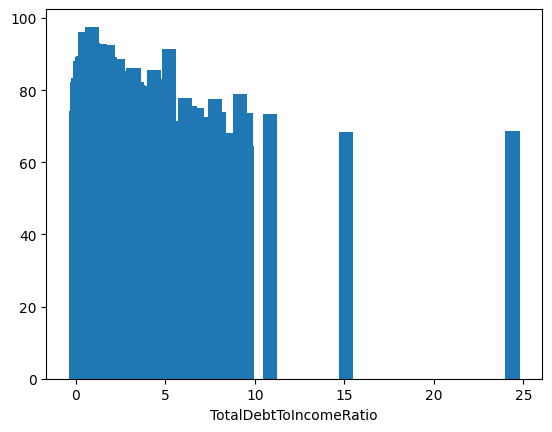

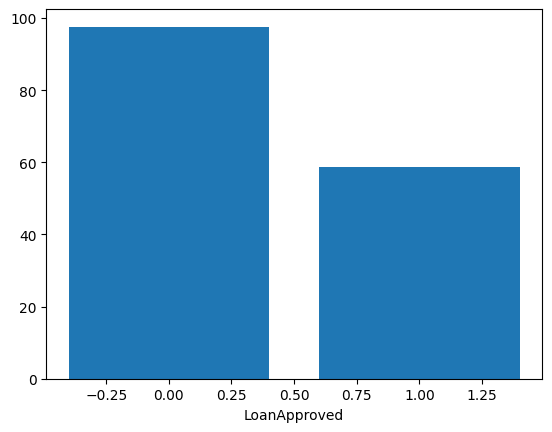

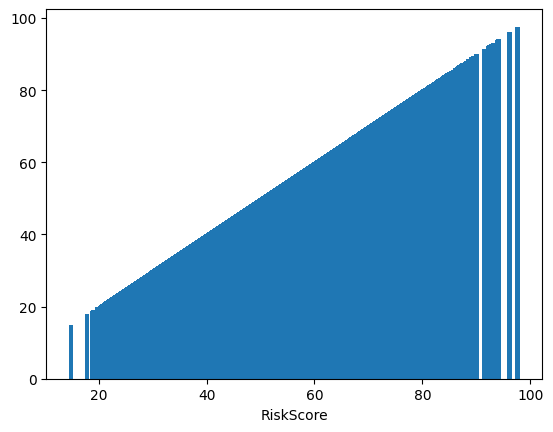

In [ ]:
for collumn in df.columns.tolist():
  if pd.api.types.is_numeric_dtype(df[collumn]):
    plt.bar(df[collumn],df['RiskScore'])
    plt.xlabel(collumn)
    plt.show()

Boxplot:Как мы можем заметить, почти каждая из фич содержит выбросы, обусловленные неравномерным распределением реальных данных: просто большого возраста(age), пиковых значений зарплат(AnnualIncome), наличие истории банкротств, различных сумм долгов, но ни одна из них(особенно фичи в процентах) не выходят за рамки предпологаемых доменов таблицы - мы их не будим чистить, используя IQR(межквартильный размах), ибо наличие данных выбросов отражает реальную картину и их исключение приведет к  сильному отклонению предсказаний от реального таргета и данных.(дабы не получить mse 100+,как я, когда думал подчистить так все выбросы)

Barplot: Как мы можем заметить, в основном вид зависимостей числовых фич от таргета либо является близким к равномерному или нормальному, либо является аналогом категориальной фичи(история банкротств), распределнные в целом логично(так кредит вероятнее менее опасно выдать не обонкротившемуся человеку, в отличии от бывшего банкрота). Также существуют гистограммы, представляющие собой некии пики, которые также обусловлены тем, что в данных фичах существует огромное количество выбросов, требующих учтения(что вылезают на boxplot), иначе мы упремся в потерю точности модели при таких предельных значений(MSE=100 привет).
p.s. riskscore от riskscore возрастает по x=y - рискскор правильный:)


In [ ]:
df = df.drop(columns=["ApplicationDate"])

In [ ]:
#df['ApplicationDate1']=df['ApplicationDate'].str.split('-').str[1]
#df['ApplicationDate1']=df['ApplicationDate1' ].astype('int64')
#df['ApplicationDate0']=df['ApplicationDate'].str.split('-').str[0]
#df['ApplicationDate0']=df['ApplicationDate0' ].astype('int64')
#df=df.drop(columns=['ApplicationDate'])

В теории, время можно или разбить на месяцы и годы, дабы найти возможную сезонность в выдаче кредитов(люди берут кредиты на айфоны под новый год и не могут вернуть), но в результате многочисленных итераций,я пришел к тому, что наиболее точные предсказания получается при удалении даты.

Теперь, как мы помним, в дата сете у нас присутствуют категориальные и порядковые признаки.(забегая на перед EducationLevel можно рассматривать как порядковые(установлен порядок получения), когда остальные Series с dtype object - только в виде категориальных). Для начала используем Onehot-encoding ради получения большего числа "бинарных" столбцов заместо наших необрабатываемых категорий.

In [ ]:
#Кайф, теперь Onehot an LabelEncoding
df.select_dtypes(include=["object"]).columns
print(df.select_dtypes(include=["object"]).columns)
df = pd.get_dummies(
    df,
    columns=["MaritalStatus", "HomeOwnershipStatus", "EmploymentStatus", "LoanPurpose"],
    drop_first=True,
)
df

Index(['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose',
       'EmploymentStatus', 'EducationLevel'],
      dtype='object')


,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,MaritalStatus_Widowed,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,27.0,66829.0,549.0,17290.0,60.0,1.0,1095.0,0.151985,2.0,1.0,...,False,False,False,True,False,False,False,True,False,False
1,55.0,172147.0,850.0,16110.0,36.0,1.0,211.0,0.175693,3.0,0.0,...,True,False,False,False,False,False,False,False,True,False
2,51.0,300000.0,850.0,38436.0,36.0,0.0,546.0,0.444605,3.0,0.0,...,False,False,False,False,False,False,False,True,False,False
3,25.0,34683.0,847.0,19186.0,48.0,0.0,153.0,0.188452,7.0,0.0,...,False,True,False,False,False,False,True,False,False,False
4,55.0,300000.0,850.0,30437.0,48.0,2.0,562.0,0.273431,3.0,1.0,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,31.0,300000.0,850.0,14503.0,60.0,2.0,185.0,0.056431,4.0,0.0,...,False,False,False,False,False,False,True,False,False,False
9995,27.0,15000.0,361.0,19505.0,36.0,1.0,622.0,0.409411,2.0,1.0,...,False,True,False,False,False,False,False,True,False,False
9996,49.0,185082.0,573.0,7447.0,84.0,0.0,946.0,0.095426,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
9997,55.0,296728.0,850.0,44162.0,84.0,2.0,479.0,0.373804,6.0,0.0,...,False,False,False,False,False,False,False,True,False,False


Также, пока я не забыл - изымем таргет, нормировав его(заведя скейлер и засунув туда таргет), дабы в последствии применить inverse_transform и получить ненормированные данные, чтобы предоставить их пользователю или использовать для вычисления MSE,MAE,R^2 и других метрик

In [ ]:
scaler_tar = MinMaxScaler()
y_unscaled = df["RiskScore"]
y_scaled = scaler_tar.fit_transform(df["RiskScore"].values.reshape(-1, 1))
df = df.drop(columns="RiskScore")


К сожалению label encoding устанавливает порядок, основываясь на алфавитном порядке среди строк, что плохо работает с названиями уровней образования гражданина, ибо Общее среднее образование получается раньше степени бакалавра, но в алфавите идет позже. что приводит к неправльному соотношению меж значениями данного атрибута. Поэтому добавим функцию transform, дабы сохоранить взаимотношение меж значениями, основываясь на взаимотношении меж ними.

In [ ]:
#образование - порядковая категория
le = LabelEncoder()
print(
    df["EducationLevel"].value_counts()
)  # Посмотрим на то, кто встречается меньше - тот важнее
# LABEL ENCODER ДАЕТ Алфавитный порядок - антибаза.
def transform(x):  # переходничек
    if x == "High School":
        return "A"
    elif x == "Bachelor":
        return "B"
    elif x == "Associate":
        return "C"
    elif x == "Master":
        return "D"
    elif x == "Doctorate":
        return "E"
    else:
        return "A"


df["EducationLevel"] = df["EducationLevel"].apply(transform)

df["EducationLevel"] = le.fit_transform(df["EducationLevel"])
# LABEL ENCODER ДАЕТ Алфавитный порядок - антибаза.


EducationLevel
High School    3758
Bachelor       2751
Associate      1836
Master          677
Doctorate       310
Name: count, dtype: int64


Пронормируем все series с арифметическими типами, исключив bool и object, если такоыве остались. Для нормировки используем MinMaxScaler(Переход к N(0,1) показал себя хуже в свое время на данных данных)

In [ ]:
df.info()
scaler_minmax = MinMaxScaler()
df_ariphmetic = df.select_dtypes(include=["float64", "int64"])
print(df_ariphmetic)
df_other = df.select_dtypes(include=["object", "bool"])
df_ariphmetic = pd.DataFrame(
    scaler_minmax.fit_transform(df_ariphmetic),
    columns=df_ariphmetic.columns,
    index=df_ariphmetic.index,
)
df = pd.concat([df_ariphmetic, df_other], axis=1)
df


<class 'pandas.core.frame.DataFrame'>
Index: 9332 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             9332 non-null   float64
 1   AnnualIncome                    9332 non-null   float64
 2   CreditScore                     9332 non-null   float64
 3   LoanAmount                      9332 non-null   float64
 4   LoanDuration                    9332 non-null   float64
 5   NumberOfDependents              9332 non-null   float64
 6   MonthlyDebtPayments             9332 non-null   float64
 7   CreditCardUtilizationRate       9332 non-null   float64
 8   NumberOfOpenCreditLines         9332 non-null   float64
 9   NumberOfCreditInquiries         9332 non-null   float64
 10  DebtToIncomeRatio               9332 non-null   float64
 11  BankruptcyHistory               9332 non-null   float64
 12  PreviousLoanDefaults            9332 no

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,MaritalStatus_Widowed,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,0.145161,0.070659,0.452727,0.038827,0.444444,0.166667,0.099577,0.162808,0.166667,0.166667,...,False,False,False,True,False,False,False,True,False,False
1,0.596774,0.214240,1.000000,0.036003,0.222222,0.166667,0.018222,0.188832,0.250000,0.000000,...,True,False,False,False,False,False,False,False,True,False
2,0.532258,0.388544,1.000000,0.089423,0.222222,0.000000,0.049052,0.484029,0.250000,0.000000,...,False,False,False,False,False,False,False,True,False,False
3,0.112903,0.026834,0.994545,0.043363,0.333333,0.000000,0.012884,0.202839,0.583333,0.000000,...,False,True,False,False,False,False,True,False,False,False
4,0.596774,0.388544,1.000000,0.070284,0.333333,0.333333,0.050525,0.296124,0.250000,0.166667,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0.209677,0.388544,1.000000,0.032158,0.444444,0.333333,0.015829,0.057914,0.333333,0.000000,...,False,False,False,False,False,False,True,False,False,False
9995,0.145161,0.000000,0.110909,0.044127,0.222222,0.166667,0.056046,0.445395,0.166667,0.166667,...,False,True,False,False,False,False,False,True,False,False
9996,0.500000,0.231875,0.496364,0.015275,0.666667,0.000000,0.085864,0.100721,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False
9997,0.596774,0.384083,1.000000,0.103124,0.666667,0.333333,0.042886,0.406307,0.500000,0.000000,...,False,False,False,False,False,False,False,True,False,False


Проанализируем Кореляцию между признаками, построив кореляционную матрицу. Дабы сохранить значимые признаки для связи с таргетом, будем удалять 1 из сильно корелирующих признаков при пороге 0.8, ибо, на практике было найдено, что удаление абсолютно всех сильно корелирующих меж собой признаков приводило к большей степени неточности модели( в последствии возможно проанализирую взаимосвязь признаков с таргетом, но пока ограничись борьбой с мультиколлиниарностью).

In [ ]:
# Вычисление корреляционной матрицы
corr_matrix = df.corr()
# Визуализация матрицы корреляций с помощью тепловой карты
plt.figure(figsize=(120, 80))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()

In [ ]:
high_corr = corr_matrix[(corr_matrix >= 0.8) & (corr_matrix != 1.0)].stack()
print(high_corr)


Age                 Experience            0.982802
AnnualIncome        MonthlyIncome         0.984441
LoanAmount          MonthlyLoanPayment    0.868404
TotalAssets         NetWorth              0.993819
MonthlyIncome       AnnualIncome          0.984441
Experience          Age                   0.982802
NetWorth            TotalAssets           0.993819
BaseInterestRate    InterestRate          0.975215
InterestRate        BaseInterestRate      0.975215
MonthlyLoanPayment  LoanAmount            0.868404
dtype: float64


OLD:Чуть по другому повырезам столбцы

Вырежем 1 столбец из пары сильнокорелировавших

In [ ]:
df = df.drop(
    columns=[
        "Age",
        "InterestRate",
        "CreditScore",
        "TotalAssets",
        "LoanAmount",
        "AnnualIncome",
    ],
    inplace=False,
)

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(120, 80))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()
high_corr = corr_matrix[(corr_matrix >= 0.7) & (corr_matrix != 1.)].stack()
print(high_corr)

MonthlyIncome  LoanApproved     0.754705
LoanApproved   MonthlyIncome    0.754705
dtype: float64


In [ ]:
high_neg_corr = corr_matrix[(corr_matrix <= -0.7) & (corr_matrix != 1.)].stack()

In [ ]:
print(high_neg_corr)

Series([], dtype: float64)


In [ ]:
#CreditScore избыточна, ибо E InterestRate, которая сильно корелирует с ней.
#df=df.drop(columns=['CreditScore'], inplace=False)

Finally: данные обработаны, подчищенны, осталось только побить их на train и test dataset и передать модели

In [ ]:
y = y_scaled
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9332 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LoanDuration                    9332 non-null   float64
 1   NumberOfDependents              9332 non-null   float64
 2   MonthlyDebtPayments             9332 non-null   float64
 3   CreditCardUtilizationRate       9332 non-null   float64
 4   NumberOfOpenCreditLines         9332 non-null   float64
 5   NumberOfCreditInquiries         9332 non-null   float64
 6   DebtToIncomeRatio               9332 non-null   float64
 7   BankruptcyHistory               9332 non-null   float64
 8   PreviousLoanDefaults            9332 non-null   float64
 9   PaymentHistory                  9332 non-null   float64
 10  LengthOfCreditHistory           9332 non-null   float64
 11  SavingsAccountBalance           9332 non-null   float64
 12  CheckingAccountBalance          9332 no

Будем использовать удобную функцию makepipeline, позволяющую обернуть вызовы многих функций и методов классов в skylearn. На момент данного варианта он состоит из функций PolynomialFeatures - создающий вспомогательные столбцы в виде линейных комбинаций между собой, дабы выявить дополнительные зависимости и GridSearchCV(Ridge(),{'alpha':[0.1,10,100,50]} - использующийся для подбора гиперпараметра  линейной регресии с Ridge регуляризацией, куда также вложен и ее вызов. После обучения подсчитаем RMSE(корень от MSE), разнормировав наш predict, дабы понять на сколько единиц ответ нашей модели отличен от таргета, а также дабы в последствии использовать разнормированный таргет для подсчета других ошибок
P.S. Фактически GridSearch в данном случае будет перебирать все указанные значения параметра из списка, обучая по модели на каждый гиперпараметр и выбирает ту,что лучше работает на валидационной выборке

In [ ]:
#pipeline = make_pipeline(MinMaxScaler(), Ridge(alpha=10.0))
pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    GridSearchCV(Ridge(), {"alpha": [0.1, 10, 100, 50]}),
)
pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)
y_test = scaler_tar.inverse_transform(y_test.reshape(-1, 1))
y_pred = scaler_tar.inverse_transform(y_pred.reshape(-1, 1))
mse = mean_squared_error(y_test, y_pred)



In [ ]:

print(np.sqrt(mse))


3.766503022861069


Подсчитаем R2,Mape и Mse. Особое внимание хотелось бы уделить именно  коэффициенту детерминации, показывающему насколько сильно предсказанные данные близки к таргету. На момент написания данных коментариев оформления, R² составлял 0.9504382930080021, что показывало высокую точность нашей модельки(если верить статьям на хабре и поисковой выдаче яндекса)

Формально:R^2 - статическая метрика регрессии, говорящая об объясняющей способности модели -  фактически равный разнице единицы и отношения МSE(дисперсий) таргета с средним, которое является константным предсказанием Mse. Обычно находится в пределах от 1(идеально решает) до 0(в 0 предсказывает средним), чем ближе к единице, тем точнее, но фактически R^2 снизу не ограничен, т.е. при желании можно получить и r^2 меньший нуля. Показывает какая доля таргета объяснена моделью( соответствует данным).

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"  MSE: {mse}")
print(f"  MAE: {mae}")
print(f"  R²: {r2}")

  MSE: 14.186545021221573
  MAE: 2.961825097416268
  R²: 0.9525043850141226


In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)

In [ ]:
print(f"  Mape: {mape}")

  Mape: 0.06896165411315788


Посмотрим на распределение наших предсказанных значений к истинным и увидим, что они близятся к прямой x=y(а также там отстствуют отрицательные предсказанные значения, что СИЛЬНО радует(они встерчались в первой итерации, когда я решил добавить данный график))

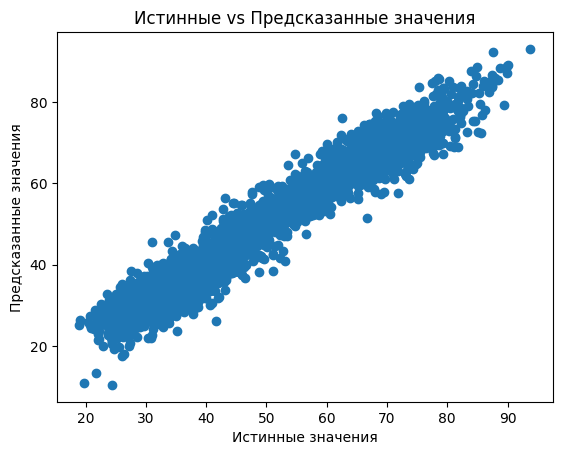

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.title("Истинные vs Предсказанные значения")
plt.show()

Теперь обработаем "Real data" и кинем результат в Kaggle.(на этом этапе воспроизводятся не все шаги, ибо я посмотрел test.cv в свое время и определил то же отсутствие пустых строк).

In [ ]:

dc = pd.read_csv("test.csv")
dc.info()
# y_pred = pd.concat(dc['ID'],pipeline.predict(dc.drop(columns='ID')))
id_num = dc["ID"]
dc = dc.drop(columns="ID")
dc[dc.select_dtypes(include=["int64"]).columns] = dc[
    dc.select_dtypes(include=["int64"]).columns
].astype("float64")
dc.info()

dc = dc.drop(columns=["ApplicationDate"])
# dc['ApplicationDate']=dc['ApplicationDate'].str.split('-').str[1]
# dc['ApplicationDate']=dc['ApplicationDate' ].astype('int64')
# dc['ApplicationDate1']=dc['ApplicationDate'].str.split('-').str[1]
# dc['ApplicationDate1']=dc['ApplicationDate1' ].astype('int64')
# dc['ApplicationDate0']=dc['ApplicationDate'].str.split('-').str[0]
# dc['ApplicationDate0']=dc['ApplicationDate0' ].astype('int64')
# dc=dc.drop(columns=['ApplicationDate'])
dc.select_dtypes(include=["object"]).columns
print(dc.select_dtypes(include=["object"]).columns)
dc = pd.get_dummies(
    dc,
    columns=["MaritalStatus", "HomeOwnershipStatus", "EmploymentStatus", "LoanPurpose"],
    drop_first=True,
)
dc
# образование - порядковая категория
le = LabelEncoder()
print(
    dc["EducationLevel"].value_counts()
)  # Посмотрим на то, кто встречается меньше - тот важнее
# LABEL ENCODER ДАЕТ Алфавитный порядок - антибаза.
def transform(x):  # переходничек
    if x == "High School":
        return "A"
    elif x == "Bachelor":
        return "B"
    elif x == "Associate":
        return "C"
    elif x == "Master":
        return "D"
    elif x == "Doctorate":
        return "E"
    else:
        return "A"


dc["EducationLevel"] = dc["EducationLevel"].apply(transform)

dc["EducationLevel"] = le.fit_transform(dc["EducationLevel"])
# LABEL ENCODER ДАЕТ Алфавитный порядок - антибаза.
dc.info()
scaler_minmax = MinMaxScaler()
dc_ariphmetic = dc.select_dtypes(include=["float64", "int64"])
print(dc_ariphmetic)
dc_other = dc.select_dtypes(include=["object", "bool"])
dc_ariphmetic = pd.DataFrame(
    scaler_minmax.fit_transform(dc_ariphmetic),
    columns=dc_ariphmetic.columns,
    index=dc_ariphmetic.index,
)
dc = pd.concat([dc_ariphmetic, dc_other], axis=1)
dc

# dc=dc.drop(columns=['Experience'], inplace=False)
# dc=dc.drop(columns=['AnnualIncome'], inplace=False)
# dc=dc.drop(columns=['BaseInterestRate'], inplace=False)
# dc=dc.drop(columns=['MonthlyLoanPayment'], inplace=False)
# Статуса одобрения кредита не будет, а вот месячный доходец
# dc=dc.drop(columns=['LoanApproved'], inplace=False)
# dc=dc.drop(columns=['NetWorth'], inplace=False)#аналогично с чистой стоимостью
# dc=dc.drop(columns=[ 'Age', 'InterestRate', 'CreditScore', 'TotalAssets', 'LoanAmount'], inplace=False)
dc = dc.drop(
    columns=[
        "Age",
        "InterestRate",
        "CreditScore",
        "TotalAssets",
        "LoanAmount",
        "AnnualIncome",
    ],
    inplace=False,
)
y_pred = pipeline.predict(dc)
print(y_pred)
y_pred = scaler_tar.inverse_transform(y_pred.reshape(-1, 1))
ans = pd.concat([id_num, pd.Series(y_pred.flatten(), name="RiskScore")], axis=1)
ans.to_csv("ex.csv", index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          5000 non-null   int64  
 1   ApplicationDate             5000 non-null   object 
 2   Age                         5000 non-null   int64  
 3   AnnualIncome                5000 non-null   int64  
 4   CreditScore                 5000 non-null   int64  
 5   LoanAmount                  5000 non-null   int64  
 6   LoanDuration                5000 non-null   int64  
 7   MaritalStatus               5000 non-null   object 
 8   NumberOfDependents          5000 non-null   int64  
 9   HomeOwnershipStatus         5000 non-null   object 
 10  MonthlyDebtPayments         5000 non-null   int64  
 11  CreditCardUtilizationRate   5000 non-null   float64
 12  NumberOfOpenCreditLines     5000 non-null   int64  
 13  NumberOfCreditInquiries     5000 